Text(0, 0.5, 't')

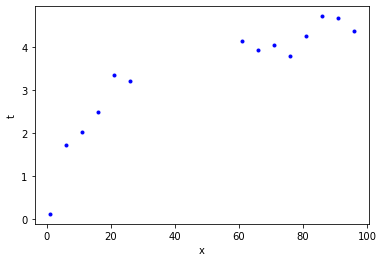

In [1]:
# Data loader - DO NOT MODIFY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('assignment1.csv').to_numpy()
x = df[:,1].reshape((-1,1))
t = df[:,2].reshape((-1,1))
# x and t are 2d arrays of shape (N,1) where N is the number of data points
plt.figure()
plt.plot(x,t,'b.')
plt.xlabel('x')
plt.ylabel('t')



# Question 1 

Use 3-fold cross-validation to select an optimal polynomial model using least squares estimation without regularization.

State the optimal degree of polynomial and print its parameters accurate to three decimal places.

Order & Train & Valid \\
0 & 1.315 & 1.657
1 & 0.532 & 1.082
2 & 0.305 & 1.048
3 & 0.195 & 0.486
4 & 0.151 & 2.065
5 & 0.111 & 12.877
6 & 0.054 & 24.554
7 & 0.013 & 21.863


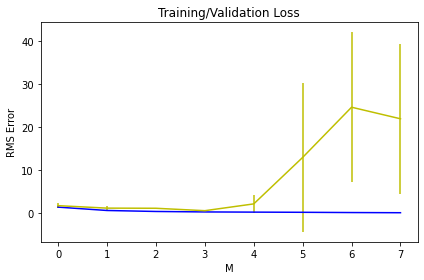

In [2]:
# Data loader - DO NOT MODIFY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('assignment1.csv').to_numpy()
x = df[:,1]
t = df[:,2]

# x and t are 2d arrays of shape (N,1) where N is the number of data points

# Construct the dataset
# the combined data for cross-validation 21 pts: 0, 5, 10,..., 95, 100

atrainval = x[1::4]
btrainval = t[1::4]

Atrainval = x[0::2]
Btrainval = t[0::2]

xtrainval = np.hstack((atrainval,Atrainval))
ttrainval = np.hstack((btrainval,Btrainval))
# a test set of 10 pts: 3, 13, 23, ..., 93
xtest = x[3::4]
ttest = t[3::4]

# We now split the dataset into five random folds

# First, combine the x and t data into a single array将x与对应的t绑定在一起，形成一个数组
trainval = np.concatenate([np.atleast_2d(xtrainval).T,np.atleast_2d(ttrainval).T],axis=1)

# Randomise the order打乱顺序
trainval = np.random.permutation(trainval)

# Split the dataset, remembering that we randomised the order of the data points. We'll split into K=3 folds.将组分成三折
Folds = [ trainval[0:2], trainval[2:6], trainval[6:11] ]

M = [0,1,2,3,4,5,6,7] # max polynomial order set to 7 because the training 次方
K = 3 # number of folds
rmstrain = [] # error on the training folds
rmsvalid = [] # RMS error on the validation fold
stdtrain = [] # standard deviation over the training sets标准偏差
stdvalid = [] # standard deviation over the validation sets

for i in M:
    # Record the performance on the folds
    train_loss = []
    validation_loss = []
    for j in range(K):
        # Select the one validation fold选一组用作验证
        Valid = Folds[j]
        # Select and combine the K-1 training folds选剩下的作为训练 问：选什么做测试？
        Train = np.concatenate(Folds[:j]+Folds[j+1:])
        # Compute the basis matrix for the training and validation folds
        PhiTrain = np.array([pow(Train[:,0],j) for j in range(0,i+1)]).transpose()
        PhiValid = np.array([pow(Valid[:,0],j) for j in range(0,i+1)]).transpose()
        # Train the model
        w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),Train[:,1]))
        # Compute the error on the training set
        train_loss.append(np.sqrt(np.average(pow(Train[:,1]-np.matmul(PhiTrain,w),2))))
        # Compute the error on the validation set
        validation_loss.append(np.sqrt(np.average(pow(Valid[:,1]-np.matmul(PhiValid,w),2))))
    # Record the average over the folds
    rmstrain.append(np.average(train_loss))
    rmsvalid.append(np.average(validation_loss))
    stdtrain.append(np.std(train_loss))
    stdvalid.append(np.std(validation_loss))    
    
plt.figure()
plt.errorbar(M,rmstrain,fmt='b-',yerr=stdtrain,label="Train")
plt.errorbar(M,rmsvalid,fmt='y-',yerr=stdvalid,label="Validation")
plt.xlabel('M')
plt.ylabel('RMS Error')
plt.title('Training/Validation Loss')
plt.tight_layout()
plt.savefig('cross-validation-loss.png')

print("Order & Train & Valid \\\\")

for i in M:
    print(f"{i:d} & {rmstrain[i]:.3f} & {rmsvalid[i]:.3f}")

According to the above,the optimal degree of polynomial is 3 
Obviously, the higher the degree of polynomial model is, the better it can adapt to the training data set. However, the adaptation to the training data set does not mean that it can be generalized to the general situation, so we should choose a model that can better adapt to the general situation.The optimal model needs to consider both function cost and accuracy.

Plot the fitted line and comment on whether it appears to represent the data well. Do you think it will generalise well to unseen data?

0 & 3.234
1 & 1.320 & 0.040
2 & 0.634 & 0.109 & -0.001
3 & -0.139 & 0.246 & -0.004 & 0.000
4 & -0.142 & 0.247 & -0.005 & 0.000 & -0.000
5 & -0.095 & 0.215 & -0.002 & -0.000 & 0.000 & -0.000
6 & -0.111 & 0.232 & -0.004 & 0.000 & -0.000 & 0.000 & -0.000
7 & -0.114 & 0.235 & -0.005 & 0.000 & -0.000 & 0.000 & -0.000 & 0.000
8 & -0.106 & 0.226 & -0.003 & 0.000 & -0.000 & 0.000 & -0.000 & 0.000 & -0.000


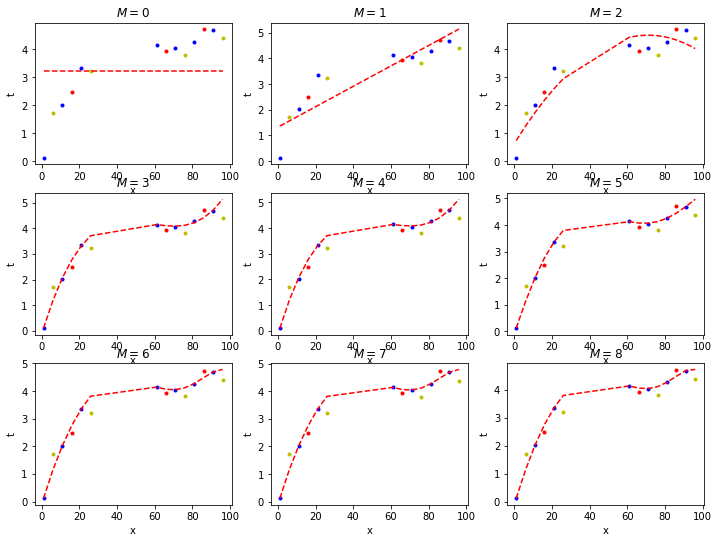

In [3]:
# The training set
import matplotlib.pyplot as plt
xtrain = x[0::2]
ttrain = t[0::2]
# The validation set
xvalid = x[1::4]
tvalid = t[1::4]
# The test set
xtest = x[3::4]
ttest = t[3::4]

# Maximum degree of fit
M = 9
# Empty list to record the RMS errors
rmstrain = []
rmsvalid = []
# Empty list to record the weights for each regression run
weights = []
plt.figure(figsize=[12,12])
# For each degree of polynomial fit
for i in range(0,M):
    # Create the Matrix of basis functions for the sampled data
    PhiTrain = np.array([pow(xtrain,j) for j in range(0,i+1)]).transpose()
    PhiValid = np.array([pow(xvalid,j) for j in range(0,i+1)]).transpose()
    PhiTest = np.array([pow(xtest,j) for j in range(0,i+1)]).transpose()
    # Create a high-resolution basis matrix so that we can plot the fitted polynomial smoothly
    hiPhi = np.array([pow(x,j) for j in range(0,i+1)]).transpose()
    # Solve the normal equations using a standard solver
    w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),ttrain))
    # record the weights
    weights.append(w)
    # Compute the estimated values of the data points so we can compute the error
    ytrain = np.matmul(PhiTrain,w)
    yvalid = np.matmul(PhiValid,w)
    # compute the RMS error
    rmstrain.append(np.sqrt(np.sum(pow(ttrain-ytrain,2)/xtrain.size)))
    rmsvalid.append(np.sqrt(np.sum(pow(tvalid-yvalid,2)/xvalid.size)))
    # plot the data and the estimates of the model for the low-res and high-res samplings
    plt.subplot(4,3,i+1)
    #plt.plot(x,h(x),'k-')
    plt.plot(xtrain,ttrain,'b.')
    plt.plot(xvalid,tvalid,'y.')
    plt.plot(xtest,ttest,'r.')
    plt.plot(x,np.matmul(hiPhi,w),'r--')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(fr'$M={i}$')
# Plot the error curve

# Print out the weights
for i,w in enumerate(weights):
    print(str(i) + ' & ' + ' & '.join(['{:.3f}'.format(i) for i in w]))    

I think when the M=3, the unseen data can be generalised well
The fluctuation range of test set points is very small, and the model trained by changing data each time can basically cover test set points, and no test set points deviating significantly from the function model can be found, so it can be considered that the model can represent data

State clearly your estimates of t for the missing values of x?

some of the data is missing, with recordings from days 31, 36, 41, 46, 51, and 56 missing 
I analysis the t of days 31,36, 41, 46, 51, and 56 is nearly 3.980 ,4.015,4.032,4.065,4.102,4.125 respectively.

# Question 2 
Compute the posterior distribution of the model parameters for the optimal model with all data points included. Assume a Gaussian Prior with mean m0=0 and covariance S0=α−1I. Set α=2.0. 

Compare the value of the mean of the posterior with your maximum likelihoood estimate.
Comment on your finding.
Under what circumstances would the maximum likelihood estimate be identical to the mean of the posterior? Verify that this is the case.

In [19]:
w_value= np.polyfit(x,t,3)

#compute the posterior
nw=np.sum([i**2 for i in w_value])
beta=0.01
alpha =2
e=2.71828
posterior= e**(-nw/alpha )

#compute the likelihood 

N=len(x)
y_value=np.polyval(w_value,x)
sum=0

for i in range(len(y_value)):
    sum+=(y_value[i]-t[i])**2
    
likelihood = e**(-beta*sum)
print("the posterior distribution is:",'{:.4f}'.format(np.mean(posterior)))
print("the likelihood estimate:",'{:.4f}'.format(np.mean(likelihood)))


the posterior distribution is: 0.9524
the likelihood estimate: 0.9911


 when k is equal to 3，the mean of the posterior and maximum likelihoood estimate are closest to each other. 
 The starting point of maximum posterior probability estimation is the same as that of maximum likelihood estimation, which is to estimate the model and parameters of the data from the known data. However, different from the maximum likelihood estimation, the maximum posterior probability estimation introduces the prior probability of parameters in parameter estimation
 In this circumstance, The value of the posterior distribution is 0.9524,and the value of the likelihood estimate is 0.9911.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

x = df[:,1]
t = df[:,2]
N = 14
sigma = 0.1
#input the parameter that produced by myself.
wtrue=np.array([-0.139,0.246,-0.004,0.000])


In [25]:
#Allow up to polynomials of degree 5
nw = 4
# Create the model
Phi = np.array([pow(x,j) for j in range(0,nw)]).transpose()
# Select up to 20 random points from the model
sample_indices = np.random.choice(np.linspace(0,N-1,N).astype(int),size=13,replace=False)



In [26]:
# Set up the initial state
alpha = 2.0
beta = (1/sigma)**2
m0 = np.zeros(wtrue.size)
S0 = (1/alpha)*np.eye(wtrue.size)

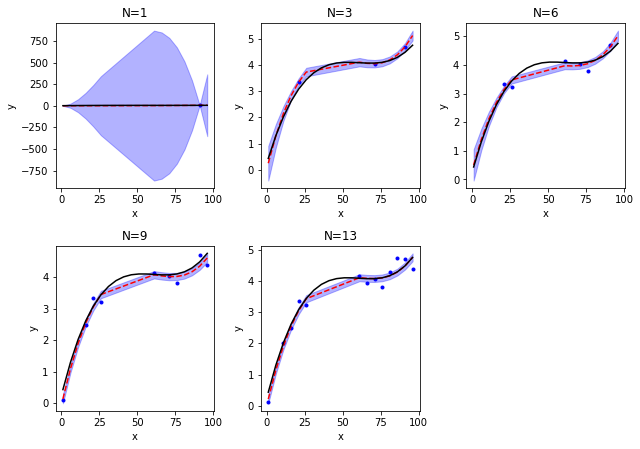

In [27]:
# Add one data point
plt.figure(figsize=[9,9])
for i,npts in enumerate([1,3,6,9,13]):
    xsample = np.atleast_2d(x[sample_indices[0:npts]])
    tsample = np.atleast_2d(t[sample_indices[0:npts]]).T
    Phisample = np.atleast_2d(Phi[sample_indices[0:npts]])
    invS0 = alpha*np.eye(nw)
    invSN = invS0 + beta*np.matmul(Phisample.T,Phisample)
    SN = np.linalg.inv(invSN)
    mN = np.squeeze(beta*np.matmul(SN,np.matmul(Phisample.T,tsample)))
    sigmasq = (1/beta) + np.diag(np.matmul(Phi,np.matmul(SN,Phi.T)))
    plt.subplot(3,3,i+1)
    #plt.plot(x,h(x),'k-')
    plt.plot(np.squeeze(xsample),np.squeeze(tsample),'b.')
    y = np.matmul(Phi,mN)
    x_tendency=[1+5*i for i in range(20)]
#3 is the highest power of the polynomial, resulting in the various coefficients of the polynomial
    w_value=np.polyfit(x,t,3)
#Compute the function value of the polynomial
    h=np.polyval(w_value, x_tendency)
    plt.plot(x,y,'r--')
    plt.fill_between(x,y-np.sqrt(sigmasq), y+np.sqrt(sigmasq),color='blue',alpha=0.3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'N={npts}')
    plt.tight_layout()
    plt.savefig('bayesianprediction.png')
    plt.plot(x_tendency,h,'k-')

Inputting my own w_value data[-0.139,0.246,-0.004,0.000] produced from Question 1 when the degree of polynomial is 3.then Output the result above.

# Question3 

Plot the uncertainty in your model's predictions.
What happens if you try to predict t  in the future? Compute and plot the mean and uncertainty of the model prediction for up to day 120. Comment on your result.

t=            3           2
1.791e-05 x - 0.00327 x + 0.1958 x + 0.2431


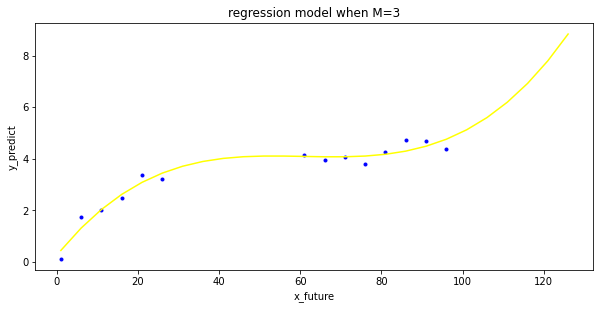

In [9]:
x = df[:,1]
t = df[:,2]

plt.figure(figsize=[10,10])

plt.subplot(2,1,1)
plt.title('regression model when M='+str(3))
plt.xlabel('x_future')
plt.ylabel('y_predict')

#x is a set of 25 pts: 1, 6, 11, 16, ..., 121
x_future=[1+5*i for i in range(0,26)]

#3 is the highest power of the polynomial, resulting in the various coefficients of the polynomial
w_value=np.polyfit(x,t,3)

#Generating polynomial objects
p1 = np.poly1d(w_value)
print('t=',p1)
#Compute the function value of the polynomial
y_predict=np.polyval(w_value,x_future)

plt.plot(x,t,'b.')
plt.plot(x_future,y_predict,color='yellow')


From 100 days to 120 days, the graph shows an upward trend.As x increases, the slope gets bigger and bigger.As x_future approach 120, the value of the function approach 6. As x_future approach 120, the value of the function hovers between 6 and 7 and close to 8.
It can be considered that it's going to keep going up in the future.